# Prerequisites Test - ES335 Machine Learning
Pranjal Goyal | 24110274  


Semester-I 2025-26

## Imports

In [58]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import jax
import sympy as sp
import random
import time

## Question 1:
How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

### Answer:

Let's take an example where $n = 3, k = 2, m = 4$. Let A be the (n, k) matrix and B be the (k, m) matrix.

$$
A_{3×2} = \begin{bmatrix}
a_{00} & a_{01} \\
a_{10} & a_{11} \\
a_{20} & a_{21}
\end{bmatrix}
$$

$$
B_{2×4} = \begin{bmatrix}
b_{00} & b_{01} & b_{02} & b_{03} \\
b_{10} & b_{11} & b_{12} & b_{04} \\
\end{bmatrix}
$$

For each element at the ith row and jth column in the resultant matrix $C = A × B$, the following calculation will be made:  

$$
\sum_{p=0}^{k-1} a_{ip} × b_{pj}
$$

So, **k** multiplication operations and **k-1** addition operations are being performed for each element in the resultant matrix.  
The resultant matrix (n, m) has nm elements in total, so:  

Number of multiplications: **mnk**  
Number of additions: **mn(k-1)**

In [59]:
# Demonstration
n, k, m = 3, 2, 4

print(f"Dimensions: n={n}, k={k}, m={m}")

A = np.random.randint(1, 10, size=(n, k))
B = np.random.randint(1, 10, size=(k, m))
C = np.zeros((n, m))

print(f"Matrix A ({n}x{k}):\n", A)
print(f"\nMatrix B ({k}x{m}):\n", B)

mult_count, add_count = 0, 0

for i in range(n):
    for j in range(m):
        for p in range(k):
            C[i, j] += A[i, p] * B[p, j]
            mult_count += 1
            if (p > 0): add_count += 1

print(f"\nResultant Matrix C ({n}x{m}):\n", C)

mult_expected = n * m * k
add_expected = n * m * (k - 1)

print(f"\nExpected number of multiplications ({m}*{n}*{k}): {mult_expected}")
print(f"Actual number of multiplications: {mult_count}\n")

print(f"Expected number of additions: ({m}*{n}*({k}-1)) {add_expected}")
print(f"Actual number of additions: {add_count}")

Dimensions: n=3, k=2, m=4
Matrix A (3x2):
 [[5 2]
 [4 4]
 [5 3]]

Matrix B (2x4):
 [[7 6 6 5]
 [5 2 9 5]]

Resultant Matrix C (3x4):
 [[45. 34. 48. 35.]
 [48. 32. 60. 40.]
 [50. 36. 57. 40.]]

Expected number of multiplications (4*3*2): 24
Actual number of multiplications: 24

Expected number of additions: (4*3*(2-1)) 12
Actual number of additions: 12


## Question 2:
Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [60]:
n = 200
k = 300
m = 400

In [61]:
# List of lists
A_list = [[random.random() for _ in range(k)] for _ in range(n)]
B_list = [[random.random() for _ in range(m)] for _ in range(k)]
C_list = [[0 for _ in range(m)] for _ in range(n)]

start_time_list = time.time()
for i in range(n):
    for j in range(m):
        for p in range(k):
            C_list[i][j] += A_list[i][p] * B_list[p][j]
end_time_list = time.time()

time_list = end_time_list - start_time_list
print(f"List of lists execution time: {time_list:.4f} seconds")

List of lists execution time: 8.6239 seconds


In [62]:
# NumPy array
A_np = np.random.rand(n, k)
B_np = np.random.rand(k, m)

start_time_np = time.time()
C_np = np.matmul(A_np, B_np)
end_time_np = time.time()

time_np = end_time_np - start_time_np
print(f"NumPy execution time: {time_np:.4f} seconds")

NumPy execution time: 0.0021 seconds


The NumPy implementation is much faster than the list of lists one. This is because NumPy internally utilises pre-compiled C code to compute the matrix product via **vectorisation**. This allows it to perform operations on entire arrays at once. On the other hand, the list of lists implementation processes each number individually.

## Question 3:
Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against `numpy.median` routine in terms of time?

### Answer
#### Method-1 (Naive)
The median of the array is the (n/2)th largest element. Using the approach that finding the kth highest element requires k passes of the array, finding the median would require (n/2) passes of the array, where each pass takes linear time ($O(n)$).  
So, time complexity of finding the median
$ = O(n × n/2) = O(n^2/2) = O(n^2)$


In [63]:
array = [random.random() for _ in range(20000)]
n = len(array)
print(array)

[0.9594625657040828, 0.8516404602036384, 0.1622925579993808, 0.707299018069493, 0.08487271767375504, 0.69301286080162, 0.7230460872266231, 0.7509568063887649, 0.08878390818873128, 0.7780355114186874, 0.6303023261861994, 0.9361684024863106, 0.3652959098628631, 0.2252695378032772, 0.1995611450436403, 0.4545498746575558, 0.14602061888219975, 0.9593617052915518, 0.9028973415474849, 0.708202197739563, 0.7686559914391777, 0.8478118998450421, 0.38393443551825324, 0.38789774107127295, 0.6896777599530713, 0.3854302233181661, 0.9550341802019735, 0.5718353162182446, 0.04604837668247663, 0.3266990260660506, 0.17379568072915186, 0.34725578866750306, 0.44329261513986806, 0.6178651855316418, 0.6176127154102258, 0.21807062613871486, 0.3316171735879825, 0.5255625662754488, 0.03681656542151779, 0.09203246401341014, 0.34023601500839284, 0.6912532144183837, 0.04263165338873698, 0.4188398258656494, 0.459088220956662, 0.13094264150023138, 0.328248875288744, 0.10222395336776202, 0.7807333395144458, 0.0950468

In [64]:
# Implementing Method-1

start_time1 = time.time()

arr = array.copy()
for _ in range(n//2):
        curr_max = max(arr) # O(n)
        arr.remove(curr_max)
median1 = curr_max

end_time1 = time.time()

time1 = end_time1 - start_time1

print(f"Median: {median1}")
print(f"Time taken: {time1:.4f} seconds")

Median: 0.5014552832010875
Time taken: 3.2203 seconds


#### Method-2 (Better)


A better approach would be to sort the array (in $O(n logn)$ time) and identifying the middlemost element in the sorted array (in constant time).  
Overall time complexity = $O(n logn)$

In [65]:
start_time2 = time.time()
median2 = sorted(array)[n // 2]
end_time2 = time.time()
time2 = end_time2 - start_time2

print(f"Median: {median2}")
print(f"Time taken: {time2:.4f} seconds")

Median: 0.5014552832010875
Time taken: 0.0039 seconds


#### Comparison with `numpy.median()`

In [66]:
start_time_np = time.time()
median_np = np.median(array)
end_time_np = time.time()

time_np = end_time_np - start_time_np

print(f"Median: {median_np}")

print(f"Method-1     | median: {median1} | time: {time1:.6f}s")
print(f"Method-2     | median: {median2} | time: {time2:.6f}s")
print(f"numpy.median | median: {median_np} | time: {time_np:.6f}s")

Median: 0.5014228887915507
Method-1     | median: 0.5014552832010875 | time: 3.220254s
Method-2     | median: 0.5014552832010875 | time: 0.003940s
numpy.median | median: 0.5014228887915507 | time: 0.002029s


## Question 4:
What is the gradient of the following function with respect to x and y?

$$x^2y + y^3 \sin(x)$$

### Answer:
$$
f(x,y) = x^2y + y^3 sin(x)
$$  
Gradient w.r.t x:
$$
\frac{\partial f}{\partial x} = \frac{\partial}{\partial x} (x^2 y + y^3 \sin(x)) \\
= 2xy + y^3 \cos(x)
$$  
Gradient w.r.t y:
$$
\frac{\partial f}{\partial y} = \frac{\partial}{\partial y} (x^2 y + y^3 \sin(x)) \\
= x^2 + 3y^2 \sin(x)
$$    

#### **Gradient vector:**
$$
\nabla f(x, y) = \left[ 2xy + y^3 \cos(x),\ x^2 + 3y^2 \sin(x) \right]
$$

In [67]:
def grad_vec(x, y):
    return [2*x*y + y**3 * np.cos(x), x**2 + 3*y**2 * np.sin(x)]

## Question 5:
Use `JAX` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [68]:
def f_jax(x, y):
    return x**2 * y + y**3 * jax.numpy.sin(x)

grad_x_jax = jax.grad(f_jax, argnums=0)
grad_y_jax = jax.grad(f_jax, argnums=1)

n_examples = 5       # number of examples

data = []

for i in range(n_examples):
    x_val = random.uniform(0, 1)
    y_val = random.uniform(0, 1)

    # Numerical gradients using JAX
    num_grad_x = grad_x_jax(x_val, y_val)
    num_grad_y = grad_y_jax(x_val, y_val)

    # Analytical gradients using SymPy
    anlt_grad_x = grad_vec(x_val, y_val)[0]
    anlt_grad_y = grad_vec(x_val, y_val)[1]

    data.append({
        'x': x_val,
        'y': y_val,
        'Numerical grad wrt x (JAX)': num_grad_x,
        'Analytical grad wrt x': anlt_grad_x,
        'Numerical grad wrt y (JAX)': num_grad_y,
        'Analytical grad wrt y': anlt_grad_y
    })

grad_comparison_df = pd.DataFrame(data)
display(grad_comparison_df)

,x,y,Numerical grad wrt x (JAX),Analytical grad wrt x,Numerical grad wrt y (JAX),Analytical grad wrt y
0,0.867093,0.327385,0.59045064,0.590451,0.9970114,0.997011
1,0.483534,0.743871,1.0838026,1.083803,1.0055732,1.005573
2,0.913225,0.739522,1.5978924,1.597892,2.1325428,2.132543
3,0.607583,0.797911,1.3866786,1.386679,1.4595402,1.459540
4,0.403358,0.425121,0.41361785,0.413618,0.37551016,0.375510


Clearly the numerical matches the analytical ones.

## Question 6:
Use `sympy` to confirm that you obtain the same gradient analytically.

In [69]:
x, y = sp.symbols('x y')

f = x**2 * y + y**3 * sp.sin(x)

grad_wrt_x = sp.diff(f, x)
grad_wrt_y = sp.diff(f, y)

print("Analytical gradient with respect to x:")
display(grad_wrt_x)

print("\nAnalytical gradient with respect to y:")
display(grad_wrt_y)

Analytical gradient with respect to x:


2*x*y + y**3*cos(x)


Analytical gradient with respect to y:


x**2 + 3*y**2*sin(x)

## Question 7:
Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:
1. 2022
    1. Branch 1
        1. Roll Number: 1, Name: N, Marks:
            1. Maths: 100, English: 70 ...
    2. Branch 2
2. 2023
    1. Branch 1
    2. Branch 2
3. 2024
    1. Branch 1
    2. Branch 2
4. 2025
    1. Branch 1
    2. Branch 2

### Answer:

In [70]:
import random

years = [2022, 2023, 2024, 2025]

student_dict = {}
ns = 3  # number of students in every branch
nb = 2  # number of branches
branches = [f"Branch {i}" for i in range(1,nb+1)]

for year in years:
    student_dict[year] = {}
    for b in range(nb):
        student_dict[year][branches[b]] = {}
        for i in range(1, ns + 1):
            roll_number = (year-2000) * 100 + ns*b + i
            name = chr(i + 64)
            marks = {
                "Maths": random.randint(0, 100),
                "English": random.randint(0, 100),
                "Physics": random.randint(0, 100)
            }
            student_dict[year][branches[b]][i] = {
                "Roll number": roll_number,
                "Name": name,
                "Marks": marks
            }

from pprint import pprint
pprint(student_dict)

{2022: {'Branch 1': {1: {'Marks': {'English': 0, 'Maths': 16, 'Physics': 73},
                         'Name': 'A',
                         'Roll number': 2201},
                     2: {'Marks': {'English': 96, 'Maths': 31, 'Physics': 74},
                         'Name': 'B',
                         'Roll number': 2202},
                     3: {'Marks': {'English': 29, 'Maths': 2, 'Physics': 89},
                         'Name': 'C',
                         'Roll number': 2203}},
        'Branch 2': {1: {'Marks': {'English': 26, 'Maths': 2, 'Physics': 52},
                         'Name': 'A',
                         'Roll number': 2204},
                     2: {'Marks': {'English': 17, 'Maths': 18, 'Physics': 11},
                         'Name': 'B',
                         'Roll number': 2205},
                     3: {'Marks': {'English': 73, 'Maths': 66, 'Physics': 5},
                         'Name': 'C',
                         'Roll number': 2206}}},
 2023: {'Branch 1

## Question 8:
Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

### Answer:

In [71]:
import random

class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

database = []
years = [2022, 2023, 2024, 2025]
ns = 3  # number of students in every branch
nb = 2  # number of branches
branch_names = [f"Branch {i}" for i in range(1, nb+1)]

for year in years:
    year_obj = Year(year)
    for b_name in branch_names:
        branch_obj = Branch(b_name)
        for i in range(1, ns+1):
            roll_number = (year-2000)*100 + branch_names.index(b_name)*ns + i
            name = chr(i+64)
            marks = {
                "Maths": random.randint(0, 100),
                "English": random.randint(0, 100),
                "Physics": random.randint(0, 100)
            }
            student_obj = Student(roll_number, name, marks)
            branch_obj.add_student(student_obj)
        year_obj.add_branch(branch_obj)
    database.append(year_obj)

def print_database(db):
    for year_obj in db:
        print(f"Year: {year_obj.year}")
        for branch_obj in year_obj.branches:
            print(f"  Branch: {branch_obj.name}")
            for student_obj in branch_obj.students:
                print(f"    Student: Roll Number - {student_obj.roll_number}, Name - {student_obj.name}")
                print(f"      Marks: {student_obj.marks}")

print_database(database)

Year: 2022
  Branch: Branch 1
    Student: Roll Number - 2201, Name - A
      Marks: {'Maths': 59, 'English': 77, 'Physics': 70}
    Student: Roll Number - 2202, Name - B
      Marks: {'Maths': 60, 'English': 0, 'Physics': 7}
    Student: Roll Number - 2203, Name - C
      Marks: {'Maths': 10, 'English': 79, 'Physics': 85}
  Branch: Branch 2
    Student: Roll Number - 2204, Name - A
      Marks: {'Maths': 34, 'English': 26, 'Physics': 11}
    Student: Roll Number - 2205, Name - B
      Marks: {'Maths': 47, 'English': 40, 'Physics': 68}
    Student: Roll Number - 2206, Name - C
      Marks: {'Maths': 69, 'English': 18, 'Physics': 69}
Year: 2023
  Branch: Branch 1
    Student: Roll Number - 2301, Name - A
      Marks: {'Maths': 57, 'English': 83, 'Physics': 34}
    Student: Roll Number - 2302, Name - B
      Marks: {'Maths': 33, 'English': 12, 'Physics': 31}
    Student: Roll Number - 2303, Name - C
      Marks: {'Maths': 15, 'English': 72, 'Physics': 51}
  Branch: Branch 2
    Student: 

## Question 9:

Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

\begin{align}
1. \quad y &= x \\
2. \quad y &= x^2 \\
3. \quad y &= \frac{x^3}{100} \\
4. \quad y &= \sin(x) \\
5. \quad y &= \frac{\sin(x)}{x} \\
6. \quad y &= \log(x) \\
7. \quad y &= e^x
\end{align}


### Answer:

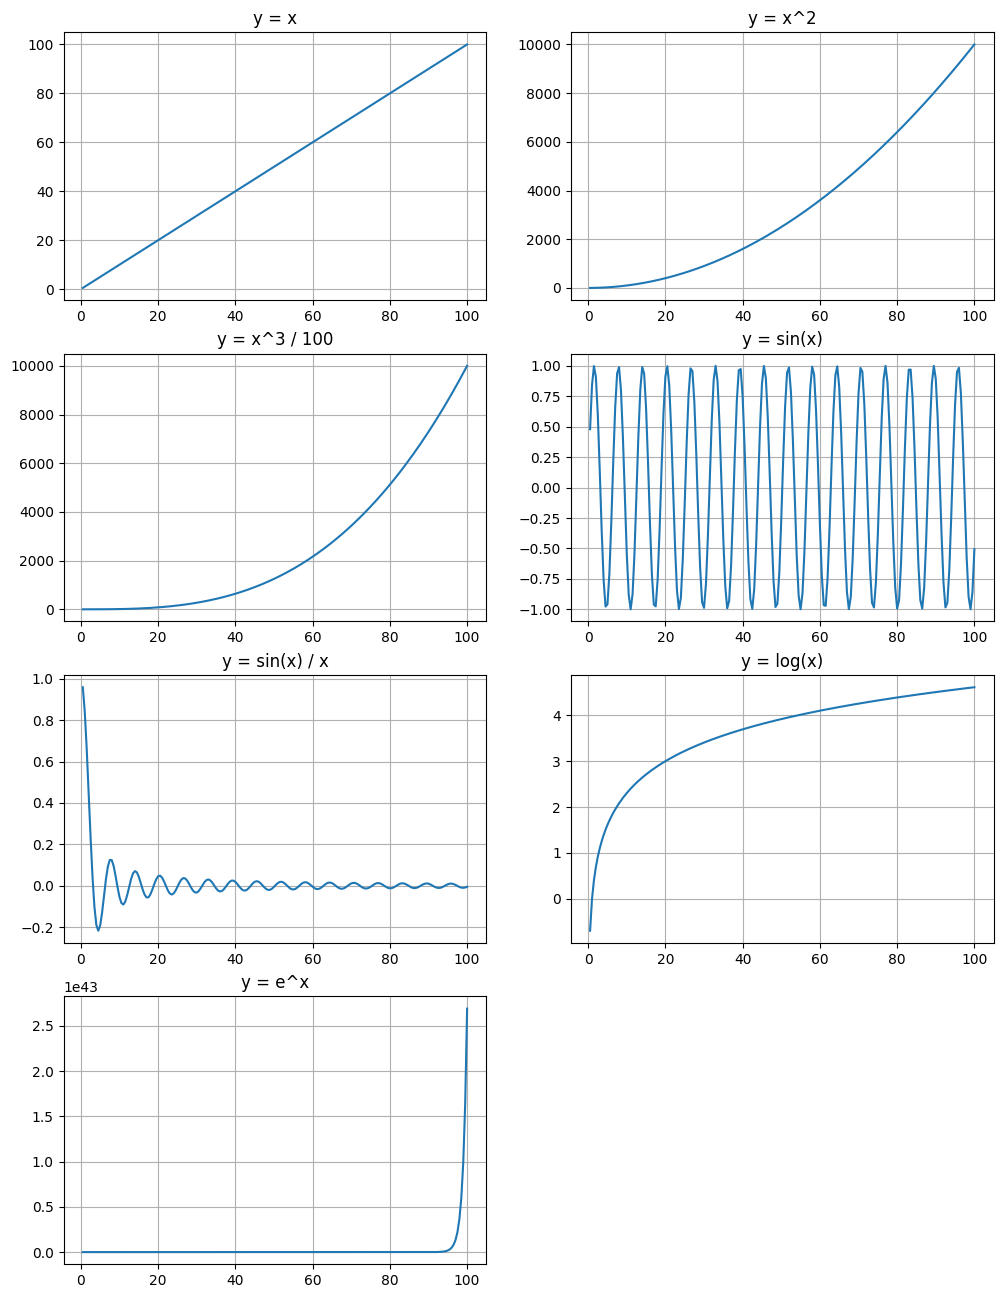

In [72]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

fig, axes = plt.subplots(4, 2, figsize=(12, 16))

axes[0][0].plot(x, y1)
axes[0][0].set_title('y = x')
axes[0][0].grid(True)

axes[0][1].plot(x, y2)
axes[0][1].set_title('y = x^2')
axes[0][1].grid(True)

axes[1][0].plot(x, y3)
axes[1][0].set_title('y = x^3 / 100')
axes[1][0].grid(True)

axes[1][1].plot(x, y4)
axes[1][1].set_title('y = sin(x)')
axes[1][1].grid(True)

axes[2][0].plot(x, y5)
axes[2][0].set_title('y = sin(x) / x')
axes[2][0].grid(True)

axes[2][1].plot(x, y6)
axes[2][1].set_title('y = log(x)')
axes[2][1].grid(True)

axes[3][0].plot(x, y7)
axes[3][0].set_title('y = e^x')
axes[3][0].grid(True)

fig.delaxes(axes[3][1])

plt.show()

## Question 10:
Using numpy generate a matrix of size `20×5` containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

### Answer:

In [73]:
matrix = np.random.uniform(1, 2, size=(20, 5))
matrix

array([[1.5915091 , 1.59393751, 1.32057937, 1.3548813 , 1.25623203],
       [1.11839698, 1.62865882, 1.20967716, 1.14932496, 1.7424185 ],
       [1.28989643, 1.33258789, 1.69146568, 1.33219875, 1.68074648],
       [1.0241208 , 1.68835337, 1.11849931, 1.77054868, 1.62501107],
       [1.52349937, 1.26111558, 1.28487418, 1.77352195, 1.9309371 ],
       [1.37152275, 1.79092238, 1.91581377, 1.08477404, 1.55198456],
       [1.0443487 , 1.80645099, 1.86787658, 1.46508243, 1.04123555],
       [1.69150604, 1.13643629, 1.35438543, 1.71073267, 1.56673556],
       [1.14767535, 1.6160099 , 1.30318969, 1.12064914, 1.04307567],
       [1.10229175, 1.79130977, 1.01012316, 1.82334334, 1.86449912],
       [1.3812655 , 1.46912429, 1.38799222, 1.77763615, 1.13105605],
       [1.42868053, 1.99497044, 1.3814    , 1.31198536, 1.21022407],
       [1.40559769, 1.84503319, 1.29852821, 1.12645825, 1.16961431],
       [1.41744091, 1.02696191, 1.92122546, 1.5271852 , 1.79720883],
       [1.65564158, 1.16474894, 1.

In [74]:
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])
df

,a,b,c,d,e
0,1.591509,1.593938,1.320579,1.354881,1.256232
1,1.118397,1.628659,1.209677,1.149325,1.742418
2,1.289896,1.332588,1.691466,1.332199,1.680746
3,1.024121,1.688353,1.118499,1.770549,1.625011
4,1.523499,1.261116,1.284874,1.773522,1.930937
5,1.371523,1.790922,1.915814,1.084774,1.551985
6,1.044349,1.806451,1.867877,1.465082,1.041236
7,1.691506,1.136436,1.354385,1.710733,1.566736
8,1.147675,1.616010,1.303190,1.120649,1.043076
9,1.102292,1.791310,1.010123,1.823343,1.864499


In [75]:
print(f"Column with the highest standard deviation: {df.std().idxmax()}")

print(f"Row with the lowest mean (index): {df.mean(axis=1).idxmin()}")

Column with the highest standard deviation: c
Row with the lowest mean (index): 8


## Question 11:
Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

### Answer:

In [76]:
df['f'] = df.sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
df

,a,b,c,d,e,f,g
0,1.591509,1.593938,1.320579,1.354881,1.256232,7.117139,LT8
1,1.118397,1.628659,1.209677,1.149325,1.742418,6.848476,LT8
2,1.289896,1.332588,1.691466,1.332199,1.680746,7.326895,LT8
3,1.024121,1.688353,1.118499,1.770549,1.625011,7.226533,LT8
4,1.523499,1.261116,1.284874,1.773522,1.930937,7.773948,LT8
5,1.371523,1.790922,1.915814,1.084774,1.551985,7.715017,LT8
6,1.044349,1.806451,1.867877,1.465082,1.041236,7.224994,LT8
7,1.691506,1.136436,1.354385,1.710733,1.566736,7.459796,LT8
8,1.147675,1.616010,1.303190,1.120649,1.043076,6.230600,LT8
9,1.102292,1.791310,1.010123,1.823343,1.864499,7.591567,LT8


In [77]:
num_lt8 = df[df['g'] == 'LT8'].shape[0]
print(f"Number of rows where 'g' is 'LT8': {num_lt8}")

Number of rows where 'g' is 'LT8': 19


In [78]:
print(f"Standard deviation of 'f' for rows where 'g' is 'LT8': {df[df['g'] == 'LT8']['f'].std()}")
print(f"Standard deviation of 'f' for rows where 'g' is 'GT8': {df[df['g'] == 'GT8']['f'].std()}")

Standard deviation of 'f' for rows where 'g' is 'LT8': 0.48881158337911207
Standard deviation of 'f' for rows where 'g' is 'GT8': nan


## Question 12:
Write a small piece of code to explain broadcasting in numpy.

### Answer:

In [79]:
arr1 = np.array([1,2,3])
arr2 = np.array([[4,5,6],[7,8,9]])

result = arr1 + arr2
print(result)

[[ 5  7  9]
 [ 8 10 12]]


Here,  
`arr1` has shape `(3,)` and
`arr2` has shape `(2,3)`  

For adding two matrices, they should have the same dimension. So, NumPy internally **broadcasts** `arr1` to match that of `arr2`. In other words, NumPy *stretches* `arr1` vertically to change its shape from `(3,)` to `(2,3)`


$$
\text{arr1} =
\begin{bmatrix}
1 & 2 & 3
\end{bmatrix}
\Rightarrow
\begin{bmatrix}
1 & 2 & 3 \\
1 & 2 & 3
\end{bmatrix}
$$

Now, element-wise addition is performed:

$$
\text{result} =
\begin{bmatrix}
1 & 2 & 3 \\
1 & 2 & 3
\end{bmatrix}
+
\begin{bmatrix}
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
=
\begin{bmatrix}
1+4 & 2+5 & 3+6 \\
1+7 & 2+8 & 3+9
\end{bmatrix}
=
\begin{bmatrix}
5 & 7 & 9 \\
8 & 10 & 12
\end{bmatrix}
$$

## Question 13
Write a function to compute the `argmin` of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the `np.argmin` function to verify your solution.

### Answer:

In [80]:
def compute_argmin(arr_np):
    min_index = 0
    for i in range(1, len(arr_np)):
        if arr_np[i] < arr_np[min_index]:
            min_index = i
    return min_index

arr = np.random.randint(1,100,20)
print("arr:", arr)
print("Finding argmin of arr:")
print(f"    Using the function: {compute_argmin(arr)}")
print(f"    Using np.argmin:    {np.argmin(arr)}")

arr: [35 38 35  2 80 52 51 10 51 37 20 53 21 53  2 60 63 24 72  9]
Finding argmin of arr:
    Using the function: 3
    Using np.argmin:    3
